In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F

In [ ]:
df = pd.read_csv("hf://datasets/DmitryKRX/anti_spam_ru/df.csv")

In [ ]:
df.shape

(66119, 2)

In [ ]:
df.head()

,text,is_spam
0,Идите до Джуронг-Пойнт с ума сойти Доступно т...,0
1,Ладно лар Шучу с тобой чувак,0
2,Ты не можешь так рано говорить хо Ты можешь уж...,0
3,Нет я не думаю что он учится в USF он живет гд...,0
4,Привет дорогая прошло уже 3 недели а ответа н...,1


In [ ]:
df.isna().sum()

,0
text,2
is_spam,0


In [ ]:
df_cleaned = df.dropna()
df_cleaned.isna().sum()

,0
text,0
is_spam,0


In [ ]:
df_cleaned.duplicated().sum()

np.int64(0)

In [ ]:
df = df_cleaned.drop_duplicates(keep='first')

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head()

,text,is_spam
0,Идите до Джуронг-Пойнт с ума сойти Доступно т...,0
1,Ладно лар Шучу с тобой чувак,0
2,Ты не можешь так рано говорить хо Ты можешь уж...,0
3,Нет я не думаю что он учится в USF он живет гд...,0
4,Привет дорогая прошло уже 3 недели а ответа н...,1


In [ ]:
# проведем базовую токенизацию
!pip install nltk

In [ ]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
# кол-во слов
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x, language='russian')))

In [ ]:
df.head()

,text,is_spam,num_characters,num_words
0,Идите до Джуронг-Пойнт с ума сойти Доступно т...,0,106,18
1,Ладно лар Шучу с тобой чувак,0,29,6
2,Ты не можешь так рано говорить хо Ты можешь уж...,0,61,12
3,Нет я не думаю что он учится в USF он живет гд...,0,56,13
4,Привет дорогая прошло уже 3 недели а ответа н...,1,138,28


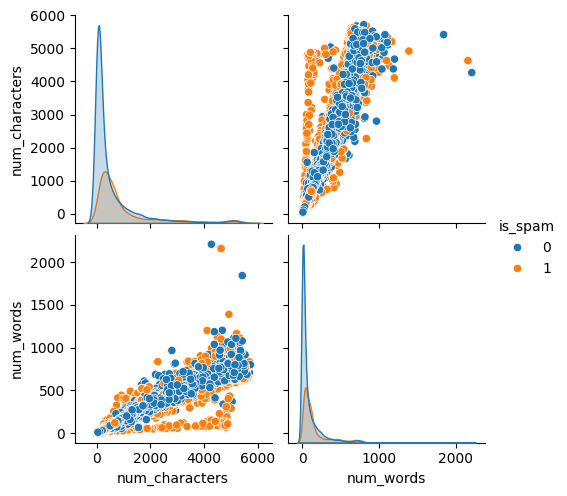

In [ ]:
import seaborn as sns

sns.pairplot(df,hue='is_spam')

In [ ]:
import re

def lower(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokens = text.split()
    tok = ' '.join(tokens)
    return tok



In [ ]:
df['proccesed_text'] = df['text'].apply(lower)
df.head()

,text,is_spam,num_characters,num_words,proccesed_text
0,Идите до Джуронг-Пойнт с ума сойти Доступно т...,0,106,18,идите до джуронгпойнт с ума сойти доступно тол...
1,Ладно лар Шучу с тобой чувак,0,29,6,ладно лар шучу с тобой чувак
2,Ты не можешь так рано говорить хо Ты можешь уж...,0,61,12,ты не можешь так рано говорить хо ты можешь уж...
3,Нет я не думаю что он учится в USF он живет гд...,0,56,13,нет я не думаю что он учится в usf он живет гд...
4,Привет дорогая прошло уже 3 недели а ответа н...,1,138,28,привет дорогая прошло уже 3 недели а ответа не...


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

for i in range(len(df['proccesed_text'])):
  lem_list = []
  for word in df['proccesed_text'][i].split():
    lemma = lemmatizer.lemmatize(word)
    lem_list.append(lemma)
  df['proccesed_text'][i] = ' '.join(lem_list)

df.head()

,text,is_spam,num_characters,num_words,proccesed_text
0,Идите до Джуронг-Пойнт с ума сойти Доступно т...,0,106,18,идите до джуронгпойнт с ума сойти доступно тол...
1,Ладно лар Шучу с тобой чувак,0,29,6,ладно лар шучу с тобой чувак
2,Ты не можешь так рано говорить хо Ты можешь уж...,0,61,12,ты не можешь так рано говорить хо ты можешь уж...
3,Нет я не думаю что он учится в USF он живет гд...,0,56,13,нет я не думаю что он учится в usf он живет гд...
4,Привет дорогая прошло уже 3 недели а ответа н...,1,138,28,привет дорогая прошло уже 3 недели а ответа не...


In [ ]:
len(df)

63011

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['proccesed_text']).toarray()
y = df['is_spam']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9202691550815718
[[9504  942]
 [ 314 4993]]
0.8412805391743892


In [ ]:
import joblib

# Предположим, что ваша модель называется `model`
joblib.dump(gnb, 'spam_model.pkl')

['spam_model.pkl']

In [ ]:
joblib.dump(tfidf, 'vectorizer.pkl')

['vectorizer.pkl']